# Analisys of flights tracked by the National Civil Aviation Agency in Brazil, 2016-17.

EDA of the dataset BrFlights available at https://www.kaggle.com/datasets/ramirobentes/flights-in-brazil/data

Predictive analisys of delayed flights

In [48]:
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from collections import Counter
from time import time

plt.style.use('ggplot')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [49]:
df = pd.read_csv('BrFlights2db.csv', encoding='latin')
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voos                  object 
 1   Companhia.Aerea       object 
 2   Codigo.Tipo.Linha     object 
 3   Partida.Prevista      object 
 4   Partida.Real          object 
 5   Chegada.Prevista      object 
 6   Chegada.Real          object 
 7   Situacao.Voo          object 
 8   Codigo.Justificativa  object 
 9   Aeroporto.Origem      object 
 10  Cidade.Origem         object 
 11  Estado.Origem         object 
 12  Pais.Origem           object 
 13  Aeroporto.Destino     object 
 14  Cidade.Destino        object 
 15  Estado.Destino        object 
 16  Pais.Destino          object 
 17  LongDest              float64
 18  LatDest               float64
 19  LongOrig              float64
 20  LatOrig               float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


In [51]:
df.isna().sum()

Voos                          0
Companhia.Aerea               0
Codigo.Tipo.Linha             0
Partida.Prevista              0
Partida.Real             289196
Chegada.Prevista              0
Chegada.Real             289196
Situacao.Voo                  0
Codigo.Justificativa    1510212
Aeroporto.Origem              0
Cidade.Origem                 0
Estado.Origem                 0
Pais.Origem                   0
Aeroporto.Destino             0
Cidade.Destino                0
Estado.Destino                0
Pais.Destino                  0
LongDest                      0
LatDest                       0
LongOrig                      0
LatOrig                       0
dtype: int64

In [52]:
df.describe(include=['object'])

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino
count,2542519,2542519,2542519,2542519,2253323,2542519,2253323,2542519,1032307,2542519,2542519,2542519,2542519,2542519,2542519,2542519,2542519
unique,6257,56,3,738010,857132,779401,881986,2,41,189,189,28,38,189,189,28,38
top,PTB - 2316,GOL,Nacional,2016-03-16T06:00:00Z,2017-01-02T06:00:00Z,2017-03-17T09:00:00Z,2017-01-02T09:00:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil
freq,3772,759191,1780319,35,21,23,18,2253323,353523,344835,344835,713500,2382839,344466,344466,707700,2382826


<Axes: title={'center': 'Top 5 Companhias Aéreas em número de vôos realizados'}, xlabel='Companhia Aérea', ylabel='Número de vôos'>

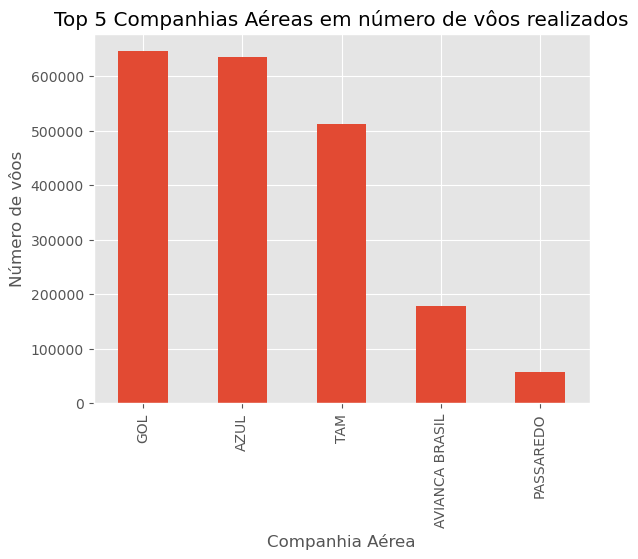

In [53]:
df.loc[df['Situacao.Voo']=='Realizado', 'Companhia.Aerea'].value_counts().head(5).plot(
    kind='bar',
    xlabel='Companhia Aérea',
    ylabel='Número de vôos',
    title='Top 5 Companhias Aéreas em número de vôos realizados')

<Axes: title={'center': 'Situação dos vôos'}>

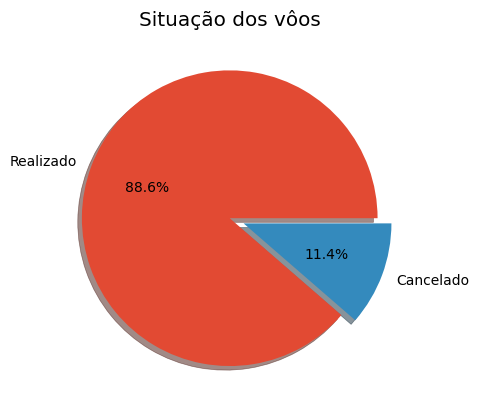

In [54]:
df['Situacao.Voo'].value_counts().plot(
    kind='pie',
    ylabel='',
    title='Situação dos vôos',
    legend=False,
    autopct='%1.1f%%',
    explode=(0, 0.1),
    shadow=True)

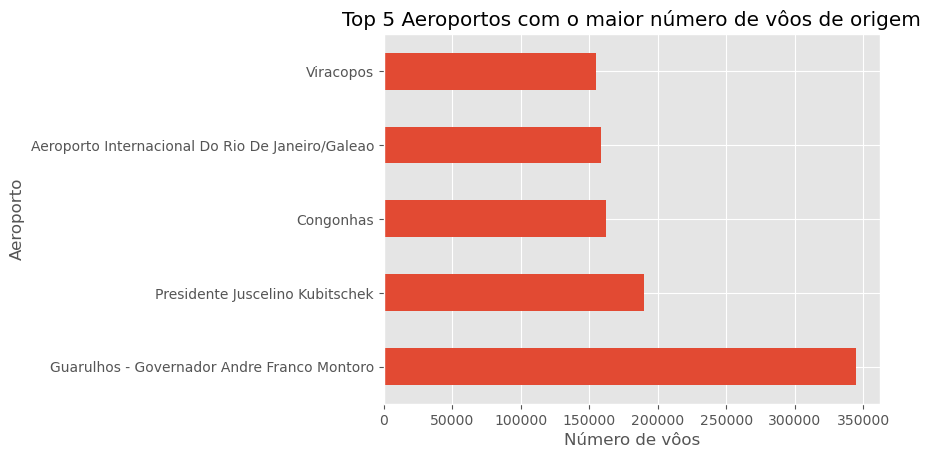

In [55]:
ax = df['Aeroporto.Origem'].value_counts().head(5).plot(
        kind='barh',
        xlabel='Número de vôos',
        ylabel='Aeroporto',
        title='Top 5 Aeroportos com o maior número de vôos de origem')
plt.show()

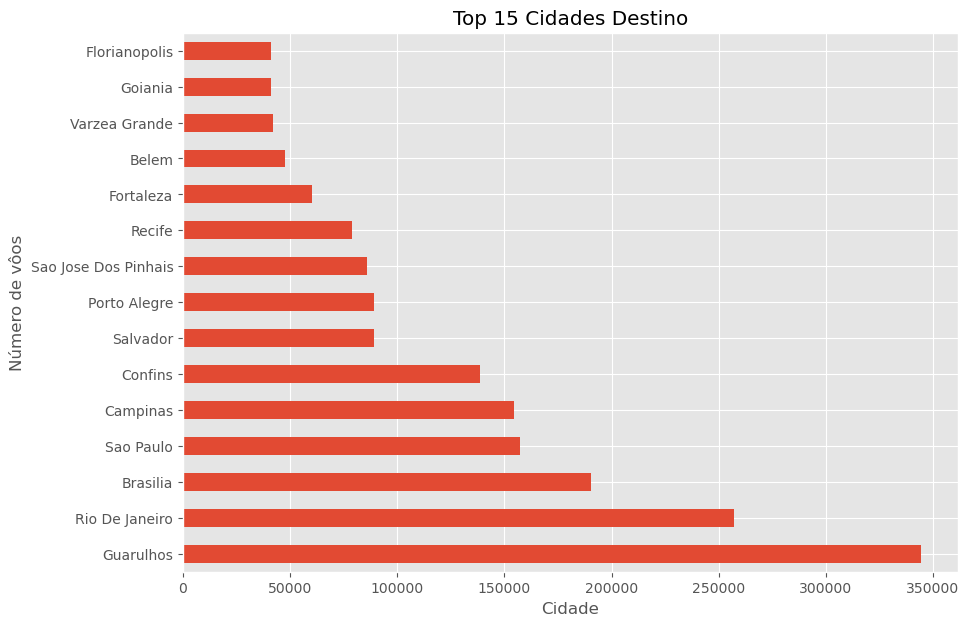

In [56]:
ax = df['Cidade.Destino'].value_counts().head(15).plot(
        kind='barh',
        xlabel='Cidade',
        ylabel='Número de vôos',
        title='Top 15 Cidades Destino',
        figsize=(10, 7))
plt.show()

<Axes: title={'center': 'Top 10 destinos estrangeiros saindo do Brasil'}, xlabel='País', ylabel='Número de vôos'>

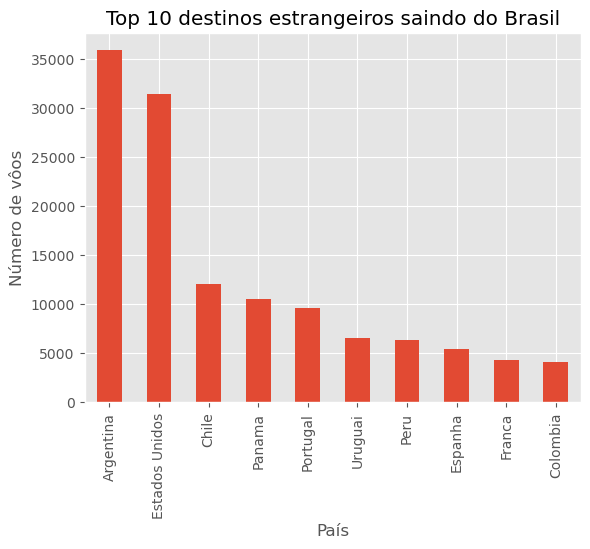

In [57]:
df_dest = df[df['Pais.Origem'] == 'Brasil'].groupby('Pais.Destino')['Pais.Destino'].count().sort_values(ascending=False).to_frame()
df_dest = df_dest.iloc[1:]
df_dest.columns = ['Voos']
df_dest.head(10).plot(kind='bar',
                      title='Top 10 destinos estrangeiros saindo do Brasil',
                      ylabel='Número de vôos',
                      xlabel='País',
                      legend=False)

In [58]:
relevant_cols = ['Companhia.Aerea', 'Codigo.Tipo.Linha', 'Partida.Prevista', 'Partida.Real', 'Cidade.Origem']
airlines = ['GOL'] #, 'AZUL', 'TAM']

delay_df = df[(df['Situacao.Voo'] == 'Realizado') & (df['Companhia.Aerea'].isin(airlines))][relevant_cols]

delay_df.isna().sum()

Companhia.Aerea      0
Codigo.Tipo.Linha    0
Partida.Prevista     0
Partida.Real         0
Cidade.Origem        0
dtype: int64

In [59]:
delay_df['Companhia.Aerea'].value_counts()

Companhia.Aerea
GOL    645727
Name: count, dtype: int64

In [60]:
delay_df['True_Departure'] = pd.to_datetime(delay_df['Partida.Real'])
delay_df['Expected_Departure'] = pd.to_datetime(delay_df['Partida.Prevista'])

In [61]:
delay_df['Delayed_Departure'] = delay_df['True_Departure'] > delay_df['Expected_Departure']
delay_df['Delayed_Departure'] = delay_df['Delayed_Departure'].map({True: 1, False: 0})
delay_df['Delayed_Departure'].value_counts()

Delayed_Departure
0    555456
1     90271
Name: count, dtype: int64

In [62]:
100.0*90271/(90271+555456)

13.979746858966715

In [63]:
delay_df['Expected_Hour_Departure'] = delay_df['Expected_Departure'].dt.hour
delay_df['Expected_Day_Departure'] = delay_df['Expected_Departure'].dt.day_of_week

delay_df[['Expected_Hour_Departure', 'Expected_Day_Departure']]

,Expected_Hour_Departure,Expected_Day_Departure
29777,6,4
29778,6,2
29779,6,5
29780,6,1
29781,6,5
...,...,...
2498960,15,4
2498961,15,3
2498962,15,6
2498963,15,0


In [64]:
delay_df['Line_Type'] = delay_df['Codigo.Tipo.Linha'].map({'Regional': 'Regional', 'Nacional': 'National', 'Internacional': 'International'})
delay_df['Line_Type'].value_counts()

Line_Type
National         544182
Regional          66358
International     35187
Name: count, dtype: int64

In [65]:
delay_df = delay_df.rename(columns={'Companhia.Aerea': 'Airline', 'Cidade.Origem': 'City'})
delay_df = delay_df[['Airline', 'Line_Type', 'Expected_Hour_Departure', 'Expected_Day_Departure', 'City', 'Delayed_Departure']]
delay_df

,Airline,Line_Type,Expected_Hour_Departure,Expected_Day_Departure,City,Delayed_Departure
29777,GOL,National,6,4,Rio De Janeiro,0
29778,GOL,National,6,2,Rio De Janeiro,0
29779,GOL,National,6,5,Rio De Janeiro,0
29780,GOL,National,6,1,Rio De Janeiro,0
29781,GOL,National,6,5,Rio De Janeiro,0
...,...,...,...,...,...,...
2498960,GOL,International,15,4,Buenos Aires,1
2498961,GOL,International,15,3,Buenos Aires,0
2498962,GOL,International,15,6,Buenos Aires,1
2498963,GOL,International,15,0,Buenos Aires,0


In [66]:
def encode_features(original_df, features_to_encode):
    return pd.get_dummies(data=original_df, columns=features_to_encode, prefix=features_to_encode, dtype=float)

In [67]:
df2 = encode_features(delay_df, ['Airline', 'Line_Type', 'Expected_Hour_Departure', 'Expected_Day_Departure', 'City'])
df2

,Delayed_Departure,Airline_GOL,Line_Type_International,Line_Type_National,Line_Type_Regional,Expected_Hour_Departure_0,Expected_Hour_Departure_1,Expected_Hour_Departure_2,Expected_Hour_Departure_3,Expected_Hour_Departure_4,...,City_Sao Jose Dos Pinhais,City_Sao Luis,City_Sao Paulo,City_Sena Madureira,City_Teresina,City_Uberlandia,City_Varzea Grande,City_Viru Viru,City_Vitoria,City_Zandery
29777,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29778,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29779,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29780,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29781,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498960,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498961,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498962,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498963,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
X = df2.drop('Delayed_Departure', axis=1)
y = df2['Delayed_Departure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(432637, 105)
(432637,)
(213090, 105)
(213090,)


In [74]:
def fit_and_predict(X_res, y_res):
    clf_names = [
        "Nearest Neighbors",
        "Decision Tree",
        "Random Forest",
        "Neural Net",
    ]

    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(max_depth=5, random_state=42),
        RandomForestClassifier(
            max_depth=5, n_estimators=10, max_features=1, random_state=42
        ),
        MLPClassifier(alpha=1, max_iter=1000, random_state=42, early_stopping=True)
    ]
    
    cms = {}
    for i, (n, clf) in enumerate(zip(clf_names, classifiers)):
        print('*'*50)
        print(f'Classifier: {n}')
        start_time = time()
        clf.fit(X_res, y_res)
        y_hat = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        print(f'score = {score}')
        print(classification_report(y_test, y_hat))

        cms[n] = (clf, metrics.confusion_matrix(y_test, y_hat))
        end_time = time()
        print(f'>> Elapsed time: {(end_time - start_time):.2f} secs')
    return cms

In [75]:
X_res_rndunder, y_res_rndunder = RandomUnderSampler().fit_resample(X_train, y_train)
print(sorted(Counter(y_res_rndunder).items()))

cms_rndunder = fit_and_predict(X_res_rndunder, y_res_rndunder)

[(0, 60710), (1, 60710)]
**************************************************
Classifier: Nearest Neighbors
score = 0.8586747383734572
              precision    recall  f1-score   support

           0       0.86      0.99      0.92    183529
           1       0.36      0.02      0.05     29561

    accuracy                           0.86    213090
   macro avg       0.61      0.51      0.48    213090
weighted avg       0.79      0.86      0.80    213090

>> Elapsed time: 65.29 secs
**************************************************
Classifier: Decision Tree
score = 0.6331831620442067
              precision    recall  f1-score   support

           0       0.90      0.65      0.75    183529
           1       0.20      0.54      0.29     29561

    accuracy                           0.63    213090
   macro avg       0.55      0.59      0.52    213090
weighted avg       0.80      0.63      0.69    213090

>> Elapsed time: 0.66 secs
**************************************************
Cla

In [76]:
X_res_tomek, y_res_tomek = TomekLinks().fit_resample(X_train, y_train)
print(sorted(Counter(y_res_tomek).items()))

cms_tomek = fit_and_predict(X_res_tomek, y_res_tomek)

[(0, 371927), (1, 60710)]
**************************************************
Classifier: Nearest Neighbors
score = 0.828814116101178
              precision    recall  f1-score   support

           0       0.87      0.94      0.90    183529
           1       0.24      0.11      0.15     29561

    accuracy                           0.83    213090
   macro avg       0.56      0.53      0.53    213090
weighted avg       0.78      0.83      0.80    213090

>> Elapsed time: 235.67 secs
**************************************************
Classifier: Decision Tree
score = 0.8612886573748182
              precision    recall  f1-score   support

           0       0.86      1.00      0.93    183529
           1       0.59      0.00      0.00     29561

    accuracy                           0.86    213090
   macro avg       0.72      0.50      0.46    213090
weighted avg       0.82      0.86      0.80    213090

>> Elapsed time: 1.76 secs
**************************************************
Cl

C:\Users\edval\anaconda3\envs\brflights-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edval\anaconda3\envs\brflights-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edval\anaconda3\envs\brflights-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

score = 0.8612745788164625
              precision    recall  f1-score   support

           0       0.86      1.00      0.93    183529
           1       0.00      0.00      0.00     29561

    accuracy                           0.86    213090
   macro avg       0.43      0.50      0.46    213090
weighted avg       0.74      0.86      0.80    213090

>> Elapsed time: 20.59 secs


C:\Users\edval\anaconda3\envs\brflights-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edval\anaconda3\envs\brflights-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edval\anaconda3\envs\brflights-env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [77]:
X_res_smote, y_res_smote = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_res_smote).items()))

cms_smote = fit_and_predict(X_res_smote, y_res_smote)

[(0, 371927), (1, 371927)]
**************************************************
Classifier: Nearest Neighbors
score = 0.8286029377258436
              precision    recall  f1-score   support

           0       0.87      0.94      0.90    183529
           1       0.24      0.11      0.15     29561

    accuracy                           0.83    213090
   macro avg       0.56      0.53      0.53    213090
weighted avg       0.78      0.83      0.80    213090

>> Elapsed time: 402.20 secs
**************************************************
Classifier: Decision Tree
score = 0.6324182270402178
              precision    recall  f1-score   support

           0       0.90      0.65      0.75    183529
           1       0.20      0.54      0.29     29561

    accuracy                           0.63    213090
   macro avg       0.55      0.59      0.52    213090
weighted avg       0.80      0.63      0.69    213090

>> Elapsed time: 3.11 secs
**************************************************


In [78]:
X_res_adasyn, y_res_adasyn = ADASYN().fit_resample(X_train, y_train)
print(sorted(Counter(y_res_adasyn).items()))

cms_adasyn = fit_and_predict(X_res_adasyn, y_res_adasyn)

[(0, 371927), (1, 360670)]
**************************************************
Classifier: Nearest Neighbors
score = 0.8285982448730583
              precision    recall  f1-score   support

           0       0.87      0.94      0.90    183529
           1       0.24      0.11      0.15     29561

    accuracy                           0.83    213090
   macro avg       0.56      0.53      0.53    213090
weighted avg       0.78      0.83      0.80    213090

>> Elapsed time: 394.52 secs
**************************************************
Classifier: Decision Tree
score = 0.6292270871462762
              precision    recall  f1-score   support

           0       0.90      0.64      0.75    183529
           1       0.20      0.54      0.29     29561

    accuracy                           0.63    213090
   macro avg       0.55      0.59      0.52    213090
weighted avg       0.80      0.63      0.69    213090

>> Elapsed time: 2.96 secs
**************************************************


In [80]:
for cm in cms_rndunder:
    print(cm)
    print(cms_rndunder[cm][1])

Nearest Neighbors
[[182260   1269]
 [ 28846    715]]
Decision Tree
[[119064  64465]
 [ 13700  15861]]
Random Forest
[[ 63865 119664]
 [  5035  24526]]
Neural Net
[[92774 90755]
 [ 7689 21872]]


In [81]:
for cm in cms_tomek:
    print(cm)
    print(cms_tomek[cm][1])

Nearest Neighbors
[[173322  10207]
 [ 26271   3290]]
Decision Tree
[[183522      7]
 [ 29551     10]]
Random Forest
[[183529      0]
 [ 29561      0]]
Neural Net
[[183529      0]
 [ 29561      0]]


In [82]:
for cm in cms_smote:
    print(cm)
    print(cms_smote[cm][1])

Nearest Neighbors
[[173248  10281]
 [ 26242   3319]]
Decision Tree
[[118896  64633]
 [ 13695  15866]]
Random Forest
[[124854  58675]
 [ 18077  11484]]
Neural Net
[[100588  82941]
 [  8923  20638]]


In [83]:
for cm in cms_adasyn:
    print(cm)
    print(cms_adasyn[cm][1])

Nearest Neighbors
[[173247  10282]
 [ 26242   3319]]
Decision Tree
[[118103  65426]
 [ 13582  15979]]
Random Forest
[[172707  10822]
 [ 26984   2577]]
Neural Net
[[98635 84894]
 [ 8623 20938]]
